In [19]:
import sys

import networkx as nx
import igraph as ig
from networkx.generators.community import LFR_benchmark_graph

import numpy as np
import scipy as sp
import time

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 3

#sys.path.append("/home/oriol/Documents/Trento/JacobianGeometry/Code/Dynamics_v2/")
#sys.path.append("/Users/giacomobarzon/Desktop/jacobian_geometry/Code_8thJune/Dynamics_v2/")
sys.path.append("/home/barzon/Network_geometry/Code_8thJune/Dynamics_v2/")

import CommonFunctions as cf
import plotter

import importlib
importlib.reload(cf)
importlib.reload(plotter)

<module 'plotter' from '/home/barzon/Network_geometry/Code_8thJune/Dynamics_v2/plotter.py'>

Block model probs: in 0.523333 - out 0.003333
Mean degree 7.4


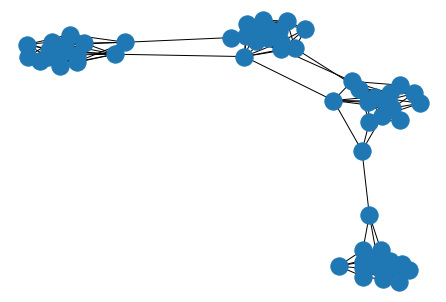

In [3]:
N = 60
mean_deg = 8.

num_groups = 4; nodes_per_group = N//4; kave = mean_deg; k_out = .15#kave is local average
k_in = kave - k_out
p_in = k_in/nodes_per_group
p_out = k_out/(nodes_per_group*num_groups - nodes_per_group)
print('Block model probs: in %f - out %f' % (p_in, p_out))

G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

while nx.is_connected(G_gn) == 0:
    print('The network should be in a single component. New trial!')
    G_gn = nx.planted_partition_graph(num_groups, nodes_per_group, p_in, p_out, directed=False)

infoG_gn = ['GN',k_out]

print('Mean degree', np.mean(list(dict(G_gn.degree()).values())))

nx.draw(G_gn)

In [ ]:
def Dij(Aij, t):
    L = np.eye(N) - Aij / np.sum(Aij, axis=1)[:,None]
    degree = np.sum(Aij, axis=1)
    
    # Compute Lsim
    D = np.diag(degree)
    D_inv = np.diag(1/degree)
    D_sqrt = sp.linalg.sqrtm(D)
    Lsim = sp.linalg.inv(D_sqrt)@(D-Aij)@sp.linalg.inv(D_sqrt)
    
    # Diagonalize Lsim
    eigvals, eig_l, eig_r = sp.linalg.eig(Lsim, left=True, right=True)

    # Get real values
    eigvals = np.real(eigvals)
    eig_l = np.real(eig_l)
    eig_r = np.real(eig_r)

In [28]:
Aij = nx.to_numpy_array(G_gn)
L = np.eye(N) - Aij / np.sum(Aij, axis=1)[:,None]

degree = np.sum(Aij, axis=1)
D = np.diag(degree)
D_inv = np.diag(1/degree)

D_sqrt = sp.linalg.sqrtm(D)

In [29]:
Lsim = sp.linalg.inv(D_sqrt)@(D-Aij)@sp.linalg.inv(D_sqrt)

In [51]:
# Diagonalize Lsim
eigvals, eig_l, eig_r = sp.linalg.eig(Lsim, left=True, right=True)

# Get real values
eigvals = np.real(eigvals)
eig_l = np.real(eig_l)
eig_r = np.real(eig_r)

In [84]:
t=1
i=0
j=1

In [93]:
np.sum( np.exp(-2*t*eigvals) * (eig_r[i]/np.sqrt(degree[i]) - eig_r[j]/np.sqrt(degree[j]))**2 ) #* np.sum(eig_r**2 * degree)

0.039461220867770395

In [94]:
# Diagonalize Lsim
eigvals, eig_l, eig_r = sp.linalg.eig(L, left=True, right=True)

# Get real values
eigvals = np.real(eigvals)
eig_l = np.real(eig_l)
eig_r = np.real(eig_r)

In [102]:
np.sum(eig_r.T@eig_r*eigvals - L)

59.77757372739492

In [105]:
np.sum( L@eig_r - eigvals*eig_r )

1.33385853635077e-14